# Load libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV

In [62]:
df = pd.read_csv('indian_national_parks_animal_population.csv')

# Check CSV Info

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Year                              175 non-null    int64 
 1   National Park/Wildlife Sanctuary  175 non-null    object
 2   State                             175 non-null    object
 3   Sq. Area (sq. km)                 175 non-null    int64 
 4   Rhinos                            175 non-null    int64 
 5   Tigers                            175 non-null    int64 
 6   Lions                             175 non-null    int64 
 7   Elephants                         175 non-null    int64 
 8   Crocodiles                        175 non-null    int64 
 9   Region                            175 non-null    object
dtypes: int64(7), object(3)
memory usage: 13.8+ KB


In [6]:
df.describe()

,Year,Sq. Area (sq. km),Rhinos,Tigers,Lions,Elephants,Crocodiles
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2007.000000,1072.800000,457.142857,85.371429,126.342857,637.142857,130.000000
std,10.128485,373.639817,920.483916,85.257920,253.942471,790.418816,194.463601
min,1990.000000,430.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1998.000000,874.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,1318.000000,0.000000,80.000000,0.000000,0.000000,0.000000
75%,2016.000000,1330.000000,0.000000,120.000000,0.000000,1500.000000,150.000000
max,2024.000000,1412.000000,2400.000000,260.000000,674.000000,1800.000000,500.000000


In [63]:
# Check sample data of CSV
df.head(5)

,Year,National Park/Wildlife Sanctuary,State,Sq. Area (sq. km),Rhinos,Tigers,Lions,Elephants,Crocodiles,Region
0,1990,Kaziranga National Park,Assam,430,2000,0,0,1600,0,East
1,1990,Jim Corbett National Park,Uttarakhand,1318,0,200,0,0,0,North
2,1990,Gir National Park,Gujarat,1412,0,0,600,0,0,West
3,1990,Sundarbans National Park,West Bengal,1330,0,80,0,0,500,East
4,1990,Bandipur National Park,Karnataka,874,0,100,0,1300,150,South


In [8]:
# Check if there is missing record
df.isnull().sum()

Year                                0
National Park/Wildlife Sanctuary    0
State                               0
Sq. Area (sq. km)                   0
Rhinos                              0
Tigers                              0
Lions                               0
Elephants                           0
Crocodiles                          0
Region                              0
dtype: int64

In [11]:
df.count()

Year                                175
National Park/Wildlife Sanctuary    175
State                               175
Sq. Area (sq. km)                   175
Rhinos                              175
Tigers                              175
Lions                               175
Elephants                           175
Crocodiles                          175
Region                              175
dtype: int64

# Since data is cean, lets analyse

In [10]:
df['National Park/Wildlife Sanctuary'].value_counts()

National Park/Wildlife Sanctuary
Kaziranga National Park      35
Jim Corbett National Park    35
Gir National Park            35
Sundarbans National Park     35
Bandipur National Park       35
Name: count, dtype: int64

In [73]:
df.groupby(['Year', 'National Park/Wildlife Sanctuary']).agg({'Sq. Area (sq. km)':'first', 'Rhinos':'sum', 'Tigers':'sum', 'Lions':'sum', 'Elephants':'sum'})
# Here multiple groupby conditions has been added. 'first' means single value since Sq. Area is same. For others, used sum.

Sq. Area (sq. km)  Rhinos  Tigers  \
Year National Park/Wildlife Sanctuary                                      
1990 Bandipur National Park                          874       0     100   
     Gir National Park                              1412       0       0   
     Jim Corbett National Park                      1318       0     200   
     Kaziranga National Park                         430    2000       0   
     Sundarbans National Park                       1330       0      80   
...                                                  ...     ...     ...   
2024 Bandipur National Park                          874       0     120   
     Gir National Park                              1412       0       0   
     Jim Corbett National Park                      1318       0     260   
     Kaziranga National Park                         430    2400       0   
     Sundarbans National Park                       1330       0      96   

                                       Lions  Elephants  
Year National Park/Wildlife Sanctuary                    
1990 Bandipur National Park                0       1300  
     Gir National Park                   600          0  
     Jim Corbett National Park             0          0  
     Kaziranga National Park               0       1600  
     Sundarbans National Park              0          0  
...                                      ...        ...  
2024 Bandipur National Park                0       1500  
     Gir National Park                   674          0  
     Jim Corbett National Park             0          0  
     Kaziranga National Park               0       1800  
     Sundarbans National Park              0          0  

[175 rows x 5 columns]

In [20]:
df.groupby(['Year', 'Region']).agg({'Sq. Area (sq. km)':'sum', 'Rhinos':'sum', 'Tigers':'sum', 'Lions':'sum', 'Elephants':'sum'})

Sq. Area (sq. km)  Rhinos  Tigers  Lions  Elephants
Year Region                                                     
1990 East                 1760    2000      80      0       1600
     North                1318       0     200      0          0
     South                 874       0     100      0       1300
     West                 1412       0       0    600          0
1991 East                 1760    2000      80      0       1600
...                        ...     ...     ...    ...        ...
2023 West                 1412       0       0    674          0
2024 East                 1760    2400      96      0       1800
     North                1318       0     260      0          0
     South                 874       0     120      0       1500
     West                 1412       0       0    674          0

[140 rows x 5 columns]

# Generating graphs for analysis

In [66]:
# Generate graph region wise
reagon_stat = df.groupby(['Year', 'Region']).agg({'Sq. Area (sq. km)':'sum', 'Rhinos':'sum', 'Tigers':'sum', 'Lions':'sum', 'Elephants':'sum'})
# Reset index while dropping the existing index to avoid column conflicts
reagon_stat = reagon_stat.reset_index()
# Determine the number of unique years to set the number of bins appropriately
num_years = reagon_stat['Year'].nunique()

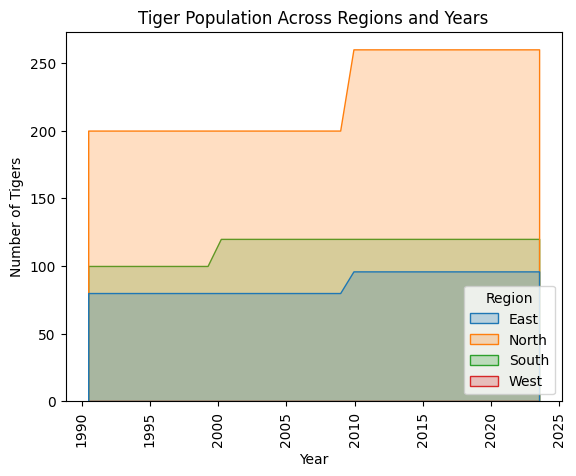

In [67]:
# Generate a histogram for tigers count analysis with specific bins
sns.histplot(data=reagon_stat, x='Year', hue='Region', weights='Tigers', element='poly', bins=num_years)
# Customize the plot
plt.title('Tiger Population Across Regions and Years')
plt.ylabel('Number of Tigers')
plt.xlabel('Year')
# Show the plot
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()

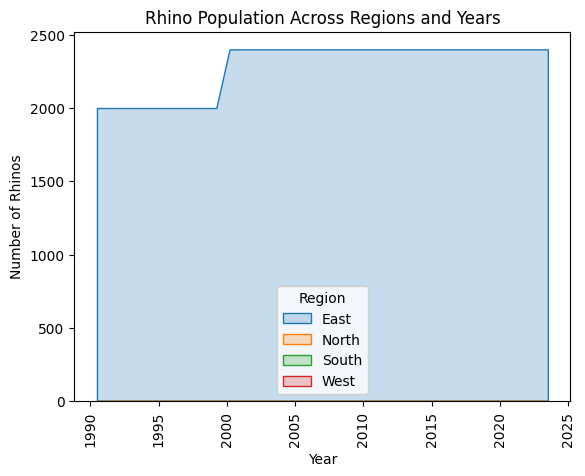

In [69]:
# Generate a histogram for Rhino count analysis with specific bins
sns.histplot(data=reagon_stat, x='Year', hue='Region', weights='Rhinos', element='poly', bins=num_years)
# Customize the plot
plt.title('Rhino Population Across Regions and Years')
plt.ylabel('Number of Rhinos')
plt.xlabel('Year')
# Show the plot
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()

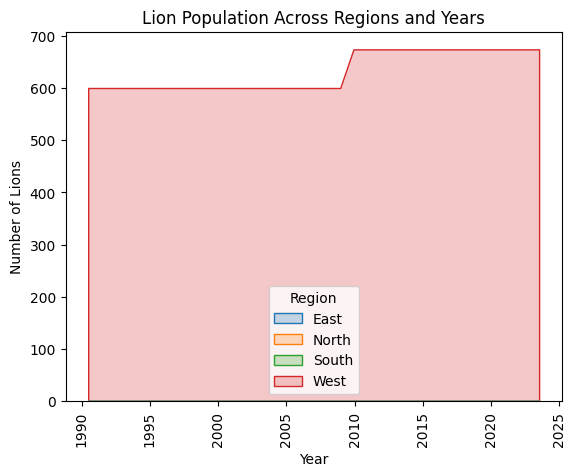

In [71]:
# Generate a histogram for Lions count analysis with specific bins
sns.histplot(data=reagon_stat, x='Year', hue='Region', weights='Lions', element='poly', bins=num_years)
# Customize the plot
plt.title('Lion Population Across Regions and Years')
plt.ylabel('Number of Lions')
plt.xlabel('Year')
# Show the plot
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()

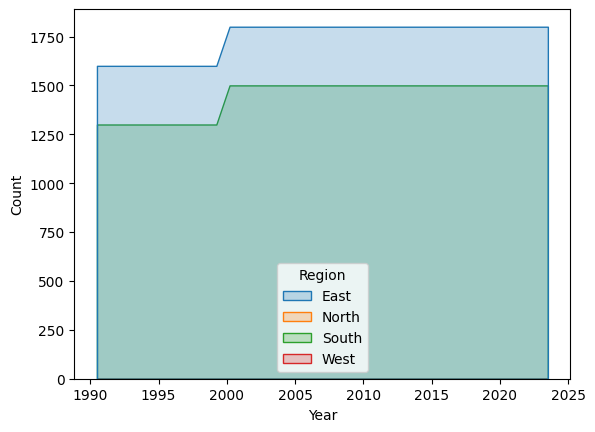

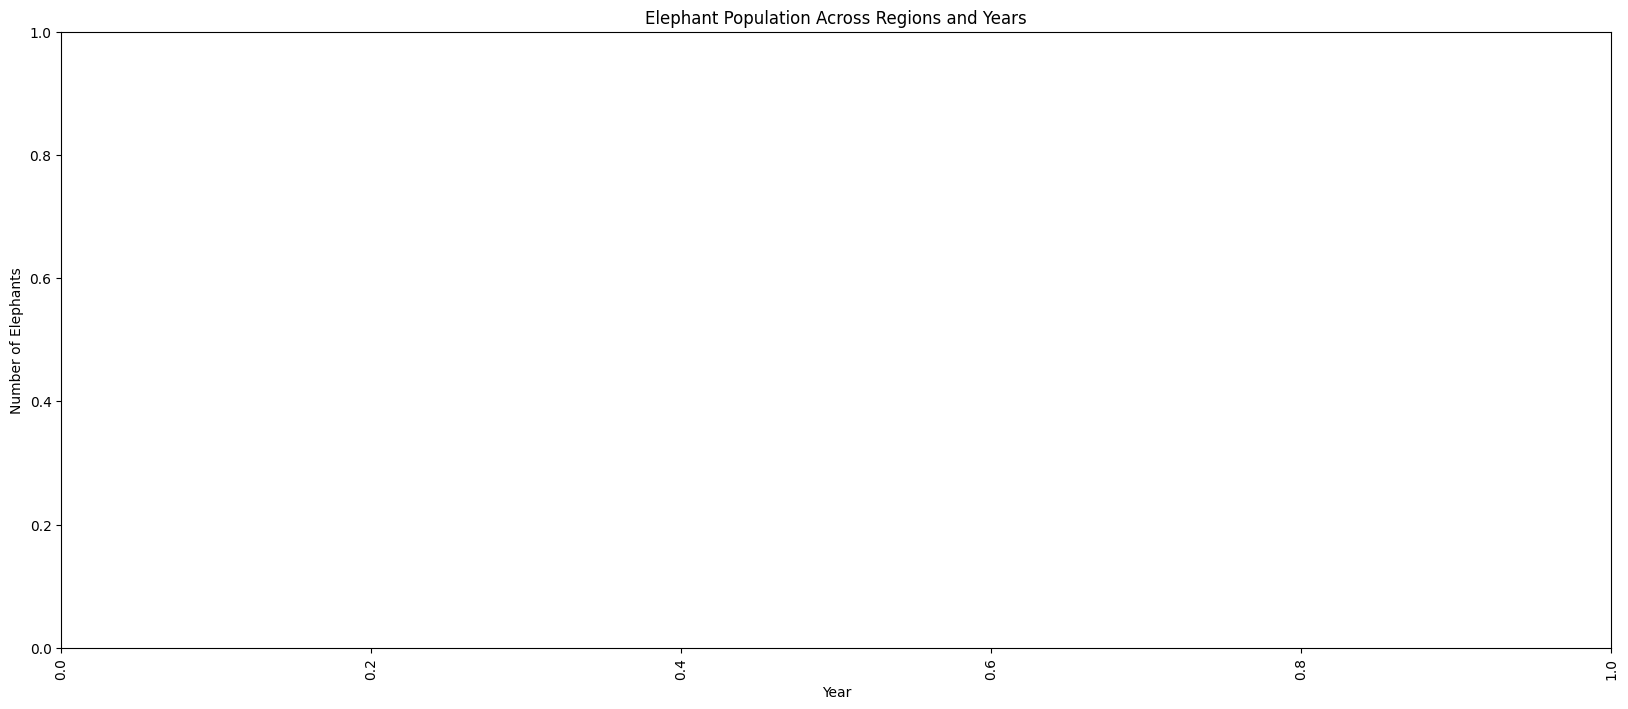

In [74]:
# Generate a histogram for Elephants count analysis with specific bins
sns.histplot(data=reagon_stat, x='Year', hue='Region', weights='Elephants', element='poly', bins=num_years)
# Customize the plot
plt.title('Elephant Population Across Regions and Years')
plt.ylabel('Number of Elephants')
plt.xlabel('Year')
# Show the plot
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()